In [1]:
!pip install pandas matplotlib seaborn wordcloud nltk sklearn transformers torch shap


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [ ]:
!pip uninstall -y sklearn
!pip install --upgrade scikit-learn


In [ ]:
!pip install --no-cache-dir --upgrade scikit-learn


In [ ]:
!pip uninstall -y sklearn scikit-learn


In [ ]:
!pip install --no-cache-dir --upgrade scikit-learn


In [ ]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load dataset
file_path = "new data set.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Fix column names (Remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Remove unnamed empty column if exists
df = df.drop(columns=[""], errors="ignore")

# Create 'Sentiment' column if missing
def classify_sentiment(rating):
    if rating >= 4.0:
        return "Positive"
    elif rating >= 3.0:
        return "Neutral"
    else:
        return "Negative"

if "Sentiment" not in df.columns:
    df["Sentiment"] = df["Ratings"].apply(classify_sentiment)

# Display dataset summary
print("Dataset Preview:")
display(df.head(10))


Dataset Preview:


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,E-Platform,Course Title,Ratings,Feedbacks,Sentiment
0,Udemy,The Data Science Course: Complete Data Science...,5.0,Este curso ÃƒÂ© muito interessante. Desde conc...,Positive
1,Udemy,The Data Science Course: Complete Data Science...,2.0,The course is really good and offers wide rang...,Negative
2,Udemy,The Data Science Course: Complete Data Science...,4.5,"I have learnt a lot about Data science, the ad...",Positive
3,Udemy,The Data Science Course: Complete Data Science...,5.0,The course was an incredible journey. While it...,Positive
4,Udemy,The Data Science Course: Complete Data Science...,2.5,"Love the overall course , it is well designed ...",Negative
5,Udemy,The Data Science Course: Complete Data Science...,3.0,"OVERALL it was a good orientation, but it some...",Neutral
6,Udemy,The Data Science Course: Complete Data Science...,5.0,Amazing course! All what is horrible in data s...,Positive
7,Udemy,The Data Science Course: Complete Data Science...,4.5,It was a really good way of getting to know th...,Positive
8,Udemy,The Data Science Course: Complete Data Science...,2.5,It looks like some dull was added to the cours...,Negative
9,Udemy,The Data Science Course: Complete Data Science...,5.0,As a Civil Engineer with a strong interest in ...,Positive


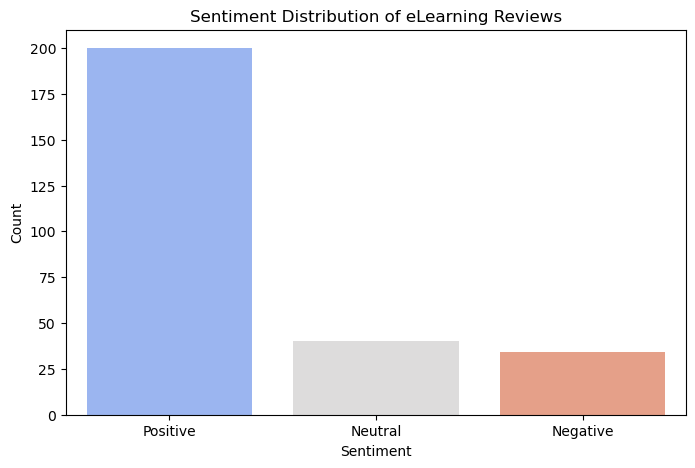

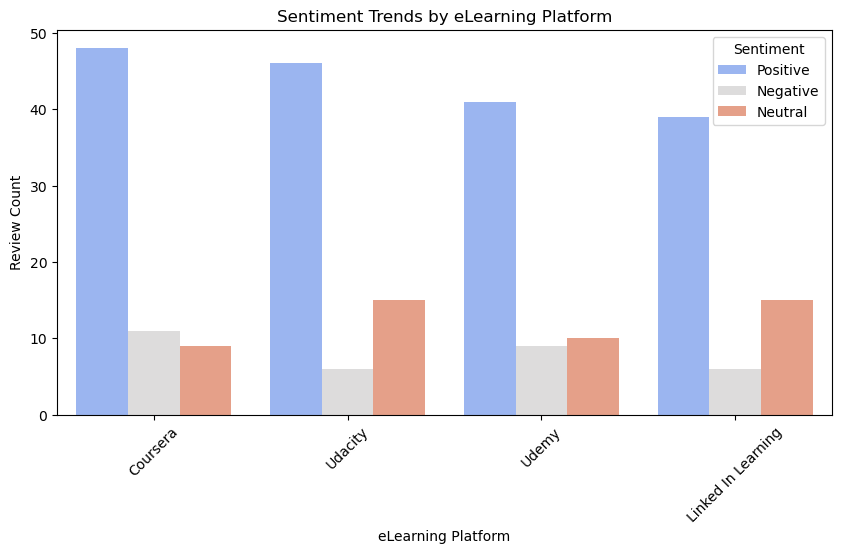

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="E-Platform", hue="Sentiment", palette="coolwarm", order=df["E-Platform"].value_counts().index)
plt.title("Sentiment Trends by eLearning Platform")
plt.xlabel("eLearning Platform")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()


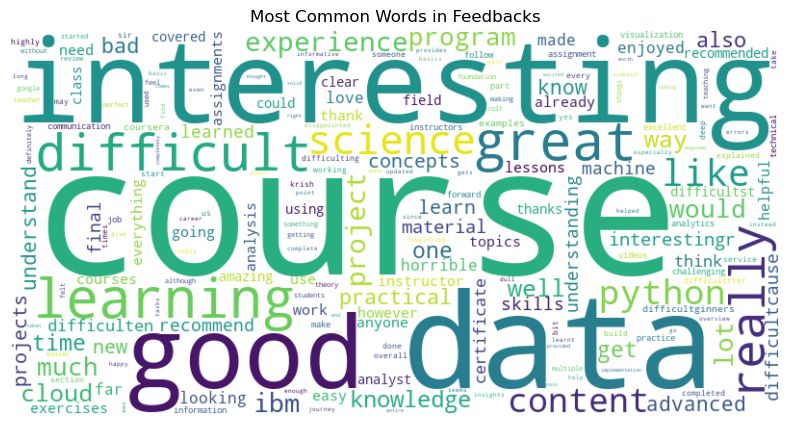

In [42]:
# Define stopwords
stop_words = set(stopwords.words("english"))

# Combine all feedbacks into one large text string
text = " ".join(df["Feedbacks"].dropna())

# Tokenize and remove stopwords
words = word_tokenize(text)
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Count word frequencies
word_freq = Counter(filtered_words)

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Feedbacks")
plt.show()


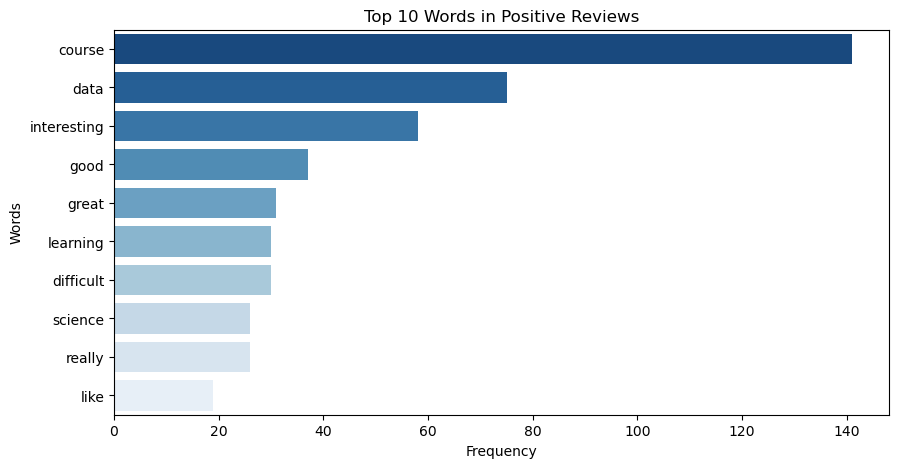

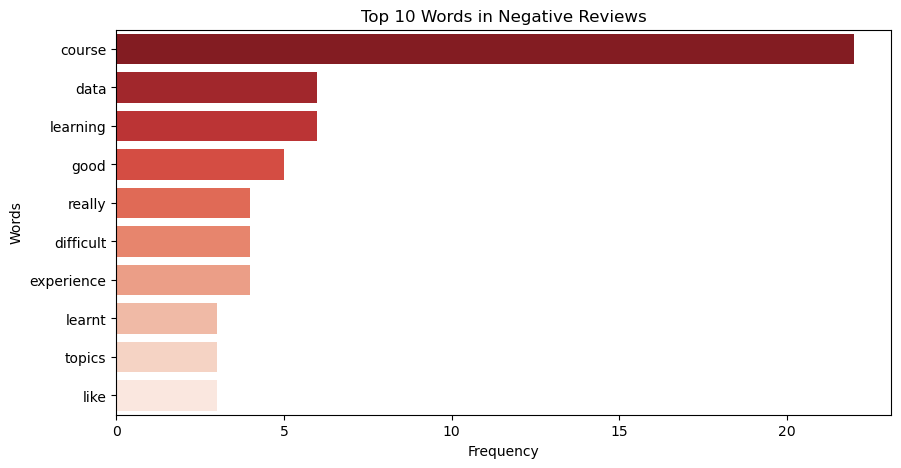

In [43]:
def get_frequent_words(sentiment_label, num_words=10):
    text = " ".join(df[df["Sentiment"] == sentiment_label]["Feedbacks"].dropna())
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    word_freq = Counter(filtered_words)
    return pd.DataFrame(word_freq.most_common(num_words), columns=["Word", "Frequency"])

# Get top words
positive_words_df = get_frequent_words("Positive")
negative_words_df = get_frequent_words("Negative")

# Plot Top 10 Words in Positive Reviews
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=positive_words_df, palette="Blues_r")
plt.title("Top 10 Words in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Plot Top 10 Words in Negative Reviews
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=negative_words_df, palette="Reds_r")
plt.title("Top 10 Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


In [44]:
# Remove rows where 'Feedbacks' is NaN
df = df.dropna(subset=["Feedbacks"])

# Alternatively, replace NaN with an empty string (less recommended)
df["Feedbacks"] = df["Feedbacks"].fillna("")

# Confirm no missing values exist
print("Missing values in 'Feedbacks':", df["Feedbacks"].isna().sum())


Missing values in 'Feedbacks': 0


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Convert Sentiment labels to numeric
df["Sentiment_Label"] = df["Sentiment"].map({"Positive": 1, "Neutral": 0, "Negative": -1})

# Split dataset (after handling missing values)
X_train, X_test, y_train, y_test = train_test_split(df["Feedbacks"], df["Sentiment_Label"], test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naïve Bayes Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7843137254901961

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.00      0.00      0.00         7
           1       0.78      1.00      0.88        40

    accuracy                           0.78        51
   macro avg       0.26      0.33      0.29        51
weighted avg       0.62      0.78      0.69        51



C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Convert Sentiment labels to numeric
df["Sentiment_Label"] = df["Sentiment"].map({"Positive": 1, "Neutral": 0, "Negative": -1})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df["Feedbacks"], df["Sentiment_Label"], test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naïve Bayes Model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_tfidf)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7843137254901961

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.00      0.00      0.00         7
           1       0.78      1.00      0.88        40

    accuracy                           0.78        51
   macro avg       0.26      0.33      0.29        51
weighted avg       0.62      0.78      0.69        51



C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Convert feedback text into count-based features
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
text_matrix = vectorizer.fit_transform(df["Feedbacks"].dropna())

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)  # 3 topics
lda_model.fit(text_matrix)

# Extract top words per topic
words = vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]  # Top 10 words per topic
    topics[f"Topic {topic_idx+1}"] = top_words

# Display discovered topics
topics_df = pd.DataFrame(topics)
print("Top Topics in Student Feedback:")
display(topics_df)


Top Topics in Student Feedback:


,Topic 1,Topic 2,Topic 3
0,project,program,bad
1,really,content,cloud
2,science,like,knowledge
3,difficult,learning,learning
4,lot,really,science
5,far,good,difficult
6,good,data,good
7,data,great,interesting
8,learning,interesting,data
9,course,course,course


In [15]:
!pip install shap


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/77/d4/5f91c30caa32fa82364d716be900b060118232a946e7b0f456f4c56321a4/shap-0.47.0-cp311-cp311-win_amd64.whl.metadata
  Using cached shap-0.47.0-cp311-cp311-win_amd64.whl.metadata (25 kB)
Using cached shap-0.47.0-cp311-cp311-win_amd64.whl (530 kB)


In [17]:
import numpy as np
print("NumPy Version:", np.__version__)


NumPy Version: 1.26.4


In [19]:
!pip install numpy==1.24


In [21]:
!pip install --upgrade numba shap


In [23]:
conda install numba shap -c conda-forge


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1




In [24]:
import shap
print("SHAP successfully installed!")


SHAP successfully installed!


  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\91984\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\91984\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


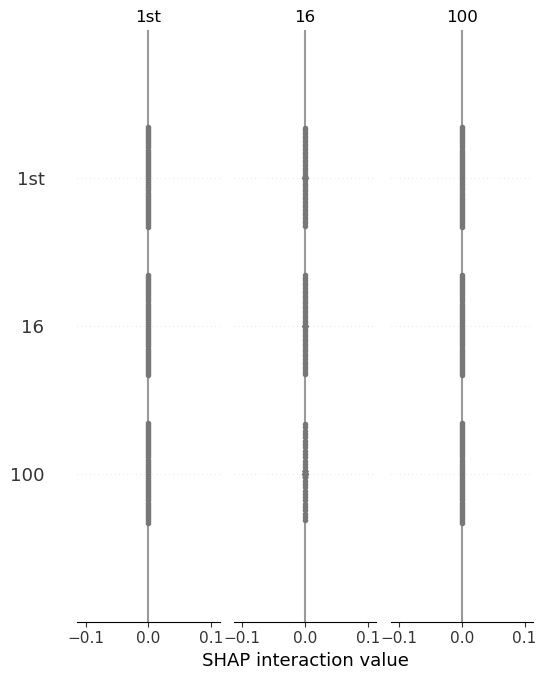

In [47]:
import shap
import numpy as np

# Ensure SHAP uses the same feature transformation as the trained model
X_explainer = X_train_tfidf[:100]  # Use training data to ensure consistent feature count

# Wrapper function to make Naïve Bayes model SHAP-compatible
def model_predict(X):
    return model.predict_proba(X)

# Define SHAP Kernel Explainer with the wrapped function
explainer = shap.KernelExplainer(model_predict, X_explainer)

# Compute SHAP values (Reduce sample size for performance)
shap_values = explainer.shap_values(X_explainer[:50])

# Plot SHAP summary
shap.summary_plot(shap_values, X_explainer[:50], feature_names=vectorizer.get_feature_names_out())


In [3]:
def get_frequent_words(sentiment_label, num_words=10):  # Change 10 to desired number
    text = " ".join(df[df["Sentiment"] == sentiment_label]["Feedbacks"].dropna())
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    word_freq = Counter(filtered_words)
    return pd.DataFrame(word_freq.most_common(num_words), columns=["Word", "Frequency"])


In [25]:
# Define custom stopwords
custom_stopwords = set(["course", "learning", "science","data","learnt","topics","like"])  # Add or remove words as needed
stop_words = stop_words.union(custom_stopwords)  # Combine with default stopwords


In [26]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not available
nltk.download('stopwords')

# Define stopwords from NLTK
stop_words = set(stopwords.words("english"))

# Add custom stopwords
custom_stopwords = set(["course", "learning", "science", "data", "learnt", "topics", "like"])  
stop_words = stop_words.union(custom_stopwords)  # Combine with default stopwords

# Confirm the updated stopwords list
print("Updated Stopwords:", list(stop_words)[:20])  # Show the first 20 stopwords


Updated Stopwords: ['mightn', 'very', 'both', "doesn't", 'be', 'her', 'other', 'd', 'was', "needn't", 'these', 'been', 'the', 'during', 'between', "he'd", 'above', "hasn't", 'but', "i'd"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Get top words
positive_words_df = get_frequent_words("Positive", num_words=5)  # Change number of words
negative_words_df = get_frequent_words("Negative", num_words=5)  # Change number of words

# Plot Top Words in Positive Reviews
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=positive_words_df, palette="Blues_r")
plt.title("Top 5 Words in Positive Reviews")  # Change title
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Plot Top Words in Negative Reviews
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=negative_words_df, palette="Reds_r")
plt.title("Top 5 Words in Negative Reviews")  # Change title
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


NameError: name 'word_tokenize' is not defined

In [20]:
df_updated.to_csv("final updated data set.csv", index=False)
print("Final dataset saved as 'final updated data set.csv'")


NameError: name 'df_updated' is not defined

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


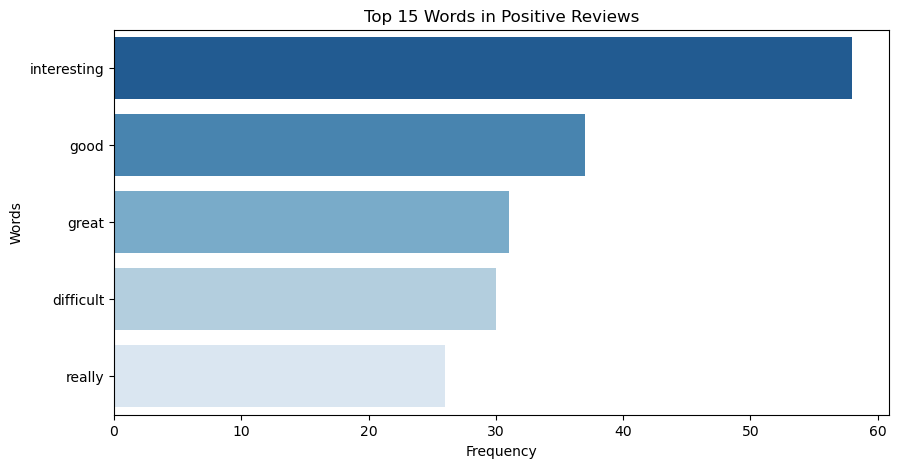

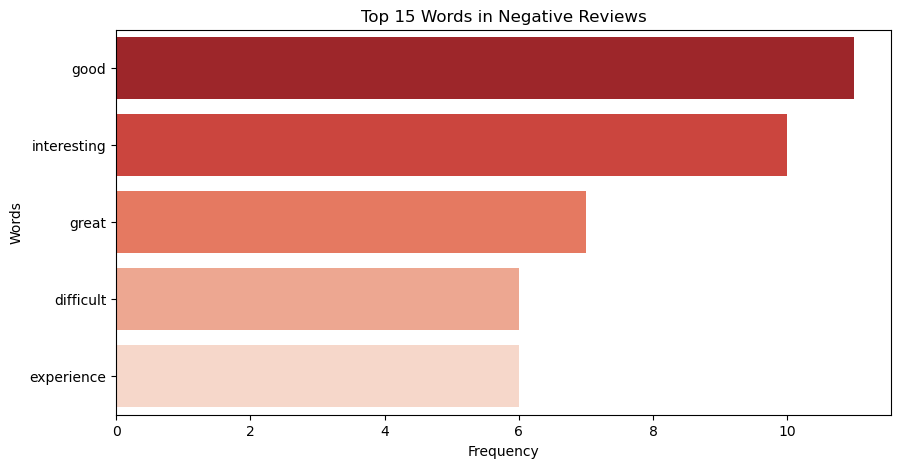

In [38]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')

# ✅ Load the dataset (Update the correct file path)
file_path = "updated data set.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# ✅ Ensure 'Sentiment' and 'Feedbacks' columns exist
if "Sentiment" not in df.columns or "Feedbacks" not in df.columns:
    raise ValueError("The dataset must contain 'Sentiment' and 'Feedbacks' columns.")

# ✅ Define stopwords from NLTK
stop_words = set(stopwords.words("english"))

# ✅ Add custom stopwords
custom_stopwords = set(["course", "learning", "science", "data", "learnt", "topics", "like"])  
stop_words = stop_words.union(custom_stopwords)  # Combine with default stopwords

# ✅ Function to Get Most Frequent Words
def get_frequent_words(sentiment_label, num_words=10):
    text = " ".join(df[df["Sentiment"] == sentiment_label]["Feedbacks"].dropna())
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    word_freq = Counter(filtered_words)
    return pd.DataFrame(word_freq.most_common(num_words), columns=["Word", "Frequency"])

# ✅ Get Top Words in Positive & Negative Reviews
positive_words_df = get_frequent_words("Positive", num_words=5)  # Get 5 words
negative_words_df = get_frequent_words("Negative", num_words=5)  # Get 5 words

# ✅ Plot Top Words in Positive Reviews
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=positive_words_df, palette="Blues_r")
plt.title("Top 15 Words in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# ✅ Plot Top Words in Negative Reviews
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=negative_words_df, palette="Reds_r")
plt.title("Top 15 Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


In [32]:
import pandas as pd

# Load dataset
file_path = "new data set.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Print column names
print("Dataset Columns:", df.columns)


Dataset Columns: Index(['E-Platform', 'Course Title', 'Ratings', 'Feedbacks', ' '], dtype='object')


In [33]:
# Remove leading/trailing spaces and rename if necessary
df.columns = df.columns.str.strip()  # Remove extra spaces

# Rename columns (Update based on actual column names)
df.rename(columns={"Review_Sentiment": "Sentiment", "Comments": "Feedbacks"}, inplace=True)

# Check if renaming worked
print("Updated Columns:", df.columns)


Updated Columns: Index(['E-Platform', 'Course Title', 'Ratings', 'Feedbacks', ''], dtype='object')


In [34]:
# Ensure the required columns exist now
if "Sentiment" not in df.columns or "Feedbacks" not in df.columns:
    raise ValueError("The dataset must contain 'Sentiment' and 'Feedbacks' columns.")

print("Dataset is correctly formatted!")


ValueError: The dataset must contain 'Sentiment' and 'Feedbacks' columns.

In [35]:
import pandas as pd

# Load dataset
file_path = "new data set.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Display column names to check for ratings
print("Dataset Columns:", df.columns)


Dataset Columns: Index(['E-Platform', 'Course Title', 'Ratings', 'Feedbacks', ' '], dtype='object')


In [18]:
# Define a function to classify sentiment based on ratings
def classify_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

# Ensure the column name is correct (update if needed)
df["Sentiment"] = df["Ratings"].apply(classify_sentiment)  # Update 'Ratings' if your column has a different name

# Check if Sentiment column is created
print(df[["Ratings", "Sentiment"]].head(10))  # Display first 10 rows


   Ratings Sentiment
0      5.0  Positive
1      2.0  Negative
2      4.5  Positive
3      5.0  Positive
4      2.5  Negative
5      3.0   Neutral
6      5.0  Positive
7      4.5  Positive
8      2.5  Negative
9      5.0  Positive


In [19]:
df.to_csv("updated data set.csv", index=False)
print("Updated dataset saved as 'updated data set.csv'")


Updated dataset saved as 'updated data set.csv'


In [20]:
df.to_csv("updated data set.csv", index=False)


In [21]:
import pandas as pd

# Load the updated dataset
file_path = "updated data set.csv"  # Ensure this is the correct filename
df_updated = pd.read_csv(file_path)

# Display the first few rows to check the dataset
print(df_updated.head(10))  # Show first 10 rows


  E-Platform                                       Course Title  Ratings  \
0      Udemy  The Data Science Course: Complete Data Science...      5.0   
1      Udemy  The Data Science Course: Complete Data Science...      2.0   
2      Udemy  The Data Science Course: Complete Data Science...      4.5   
3      Udemy  The Data Science Course: Complete Data Science...      5.0   
4      Udemy  The Data Science Course: Complete Data Science...      2.5   
5      Udemy  The Data Science Course: Complete Data Science...      3.0   
6      Udemy  The Data Science Course: Complete Data Science...      5.0   
7      Udemy  The Data Science Course: Complete Data Science...      4.5   
8      Udemy  The Data Science Course: Complete Data Science...      2.5   
9      Udemy  The Data Science Course: Complete Data Science...      5.0   

                                           Feedbacks    Sentiment  
0  Este curso ÃƒÂ© muito interessante. Desde conc...     Positive  
1  The course is really goo

In [22]:
print(df_updated["Sentiment"].value_counts())  # Count of each sentiment category


Sentiment
Positive    174
Negative     68
Neutral      32
Name: count, dtype: int64


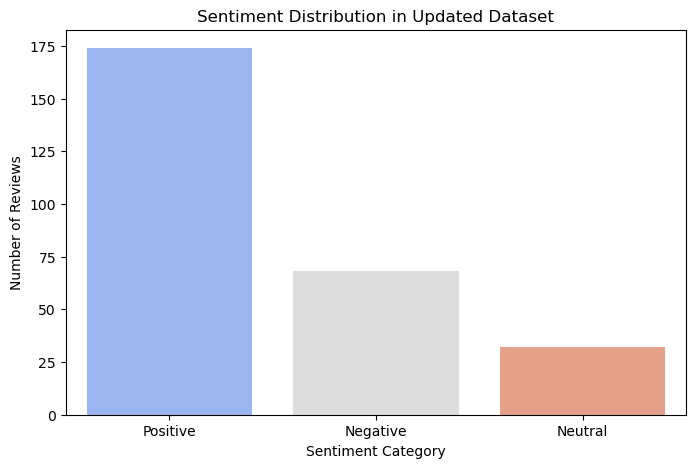

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_updated, x="Sentiment", palette="coolwarm")
plt.title("Sentiment Distribution in Updated Dataset")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.show()


In [24]:
df_updated.to_csv("final updated data set.csv", index=False)
print("Final dataset saved as 'final updated data set.csv'")


Final dataset saved as 'final updated data set.csv'


In [39]:
display(df)  # Show entire dataset (for small files)

,E-Platform,Course Title,Ratings,Feedbacks,,Sentiment
0,Udemy,The Data Science Course: Complete Data Science...,5.0,Este curso ÃƒÂ© muito interessante. Desde conc...,,Positive
1,Udemy,The Data Science Course: Complete Data Science...,2.0,The course is really good and offers wide rang...,,Negative
2,Udemy,The Data Science Course: Complete Data Science...,4.5,"I have learnt a lot about Data science, the ad...",,Positive
3,Udemy,The Data Science Course: Complete Data Science...,5.0,The course was an incredible journey. While it...,,Positive
4,Udemy,The Data Science Course: Complete Data Science...,2.5,"Love the overall course , it is well designed ...",,Negative
...,...,...,...,...,...,...
269,Linked In Learning,Data Analytics: Dashboards vs. Data Stories,2.0,This is one of the Difficultst courses I have ...,NaN,Negative
270,Linked In Learning,Data Analytics: Dashboards vs. Data Stories,3.5,"Would have liked more meaningfull examples, so...",NaN,Negative
271,Linked In Learning,Data Analytics: Dashboards vs. Data Stories,4.5,I really enjoyed the thoroughness of the cours...,NaN,Positive
272,Linked In Learning,Data Analytics: Dashboards vs. Data Stories,5.0,Really great course! Just feel like there migh...,NaN,Positive


In [40]:
import pandas as pd

# Load the updated dataset
file_path = "updated data set.csv"  # Ensure this is the correct filename
df_updated = pd.read_csv(file_path)


In [41]:
print(df_updated.to_string())  # Prints the entire dataset


             E-Platform                                                            Course Title  Ratings                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [42]:
!pip install openpyxl


In [43]:
import pandas as pd

# Load the updated dataset (if not already loaded)
file_path = "updated data set.csv"  # Ensure the correct filename
df_updated = pd.read_csv(file_path)

# Save to Excel file
excel_filename = "updated data set.xlsx"
df_updated.to_excel(excel_filename, index=False, engine="openpyxl")

print(f"Dataset successfully saved as '{excel_filename}'!")


Dataset successfully saved as 'updated data set.xlsx'!


In [45]:
# Define a list of words that shouldn't appear in negative reviews
positive_words_to_remove = {"great", "good", "interesting", "like", "know"}

# Modify the function to exclude these words
def get_frequent_words(sentiment_label, num_words=10):
    text = " ".join(df[df["Sentiment"] == sentiment_label]["Feedbacks"].dropna())
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() 
                      and word.lower() not in stop_words 
                      and word.lower() not in positive_words_to_remove]  # Exclude positive words
    word_freq = Counter(filtered_words)
    return pd.DataFrame(word_freq.most_common(num_words), columns=["Word", "Frequency"])


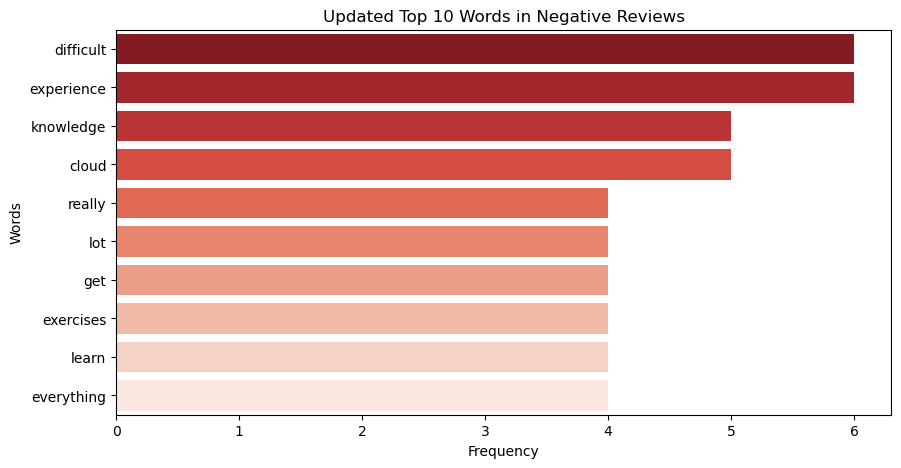

In [46]:
# Get top words in negative reviews
negative_words_df = get_frequent_words("Negative", num_words=10)

# Plot updated Top 10 Words in Negative Reviews
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=negative_words_df, palette="Reds_r")
plt.title("Updated Top 10 Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


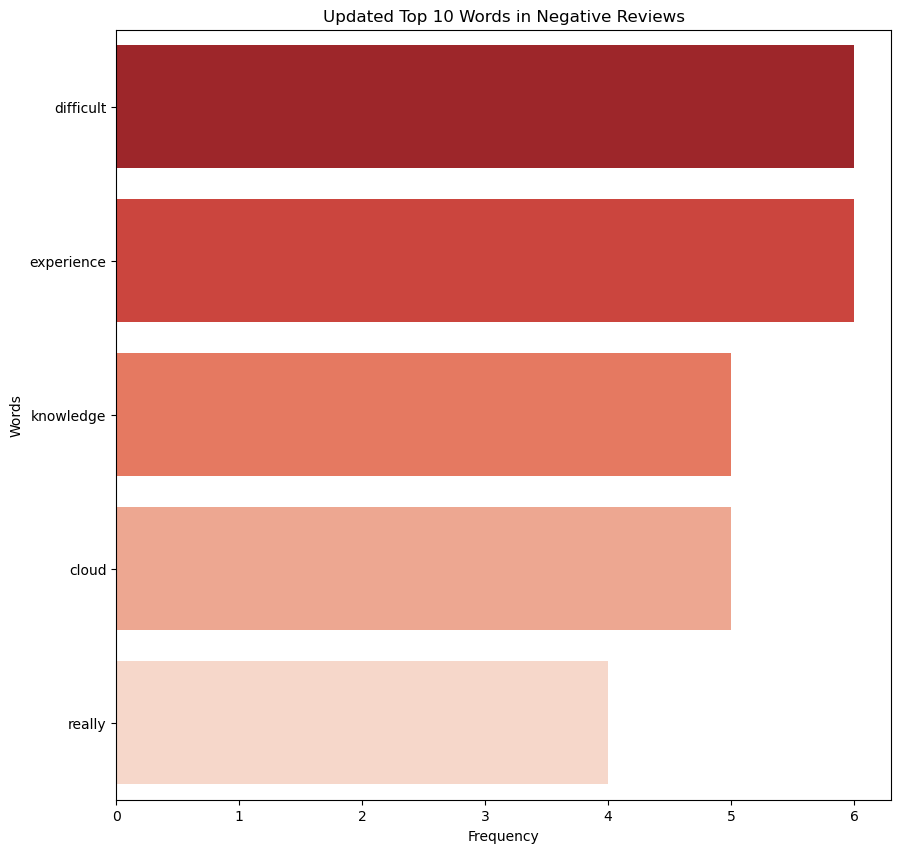

In [49]:
plt.figure(figsize=(10, 10))
sns.barplot(x="Frequency", y="Word", data=negative_words_df, palette="Reds_r")
plt.title("Updated Top 10 Words in Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


In [51]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
# Load dataset
file_path = "updated data set.csv"  # Update this with your correct dataset path
df = pd.read_csv(file_path)

# Check if necessary columns exist
if "Sentiment" not in df.columns or "Feedbacks" not in df.columns:
    raise ValueError("Dataset must contain 'Sentiment' and 'Feedbacks' columns.")

# Convert sentiment labels to numerical values
sentiment_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1}
df["Sentiment_Label"] = df["Sentiment"].map(sentiment_mapping)

# Drop missing values
df.dropna(subset=["Feedbacks"], inplace=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df["Feedbacks"], df["Sentiment_Label"], test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for performance
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [54]:
# Define different ML models
models = {
    "Naïve Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine (SVM)": SVC(kernel="linear", probability=True)
}

# Train & Evaluate Each Model
model_results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)  # Train model
    y_pred = model.predict(X_test_tfidf)  # Predict
    accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
    
    # Store results
    model_results[model_name] = {
        "model": model,
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred)
    }

    print(f"{model_name} Accuracy: {accuracy:.2%}\n")


Training Naïve Bayes...
Naïve Bayes Accuracy: 78.43%

Training Logistic Regression...


C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packag

Logistic Regression Accuracy: 78.43%

Training Random Forest...
Random Forest Accuracy: 74.51%

Training Support Vector Machine (SVM)...
Support Vector Machine (SVM) Accuracy: 76.47%



C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Model Performance Comparison:

Naïve Bayes: 78.43%
Logistic Regression: 78.43%
Random Forest: 74.51%
Support Vector Machine (SVM): 76.47%


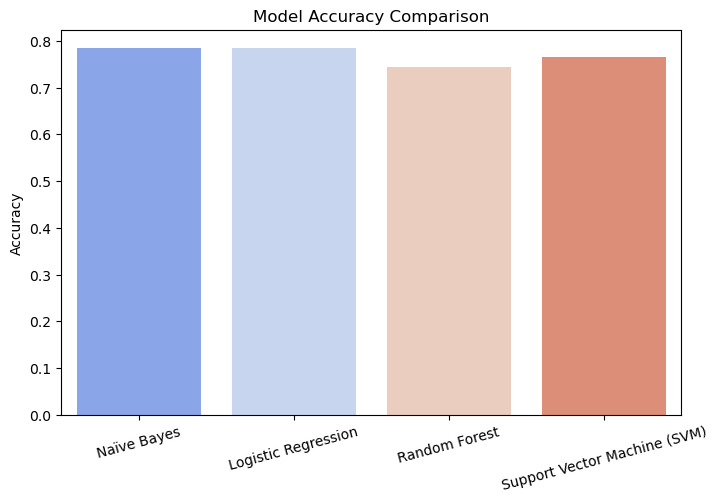

In [55]:
# Print accuracy comparison
print("\n📊 Model Performance Comparison:\n")
for model_name, results in model_results.items():
    print(f"{model_name}: {results['accuracy']:.2%}")

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_results.keys()), y=[res["accuracy"] for res in model_results.values()], palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=15)
plt.show()


<Figure size 600x600 with 0 Axes>

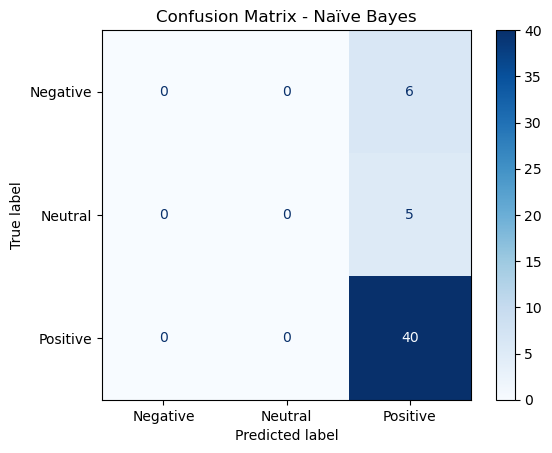

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

# Choose the best model based on accuracy
best_model_name = max(model_results, key=lambda k: model_results[k]["accuracy"])
best_model = model_results[best_model_name]["model"]

# Predict with the best model
y_pred_best = best_model.predict(X_test_tfidf)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, display_labels=["Negative", "Neutral", "Positive"], cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()


In [57]:
pip install tensorflow transformers torch datasets nltk scikit-learn pandas numpy matplotlib seaborn


  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/eb/57/3a3f14d3a759dcf9bf6e9eda905794726b758819df4663f217d658a58695/numpy-2.0.2-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl.metadata (59 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
aequitas 1.0.0 requires numpy==1.23.5, but you have numpy 1.26.4 which is incompatible.


In [61]:
pip uninstall tensorflow keras h5py --yes


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.9.0
Uninstalling keras-3.9.0:
  Successfully uninstalled keras-3.9.0
Found existing installation: h5py 3.12.1
Uninstalling h5py-3.12.1:
  Successfully uninstalled h5py-3.12.1
Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install tensorflow keras h5py --upgrade


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/3c/e3/e868f1d5951047f950d2ba1e04a765a3328a51f06996b67976d6102f8227/tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/2b/98/e81c6b2cb522f0eadcc8e16f3cabaccd5462bff6cf52194acfed4a031d3f/keras-3.9.0-py3-none-any.whl.metadata
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Obtaining dependency information for tensorboard~=2.19.0 from https://files.pythonhosted.org/packages/5d/12/4f70e8e2ba0dbe72ea978429d8530b0333f0ed2140cc571a48802878ef99/tensorboard-2.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for numpy<2.2.0,>=1.26.0 from https://files.pythonhosted.org/packages/1e/48/a9a4b538e28f854bfb62e1dea3c8fea12e90216a276c7777ae5345ff29a7/numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ----------------

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\91984\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\91984\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\91984\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\91984\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 94, in read
    self.__buf.write(data)
  File "C:\Users\91984\anaconda3\Lib\tempfile.py", line 483, in func_wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 28] No space left on device

During handling of the above exception, another exception occurred:

Traceback (most recent call last):

In [63]:
import tensorflow as tf
import keras

print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)


ModuleNotFoundError: No module named 'keras'

In [58]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from torch.utils.data import DataLoader
from transformers import AdamW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Download required NLTK data
nltk.download("stopwords")


ImportError: DLL load failed while importing _errors: The specified procedure could not be found.

In [64]:
# Load dataset
file_path = "updated data set.csv"
df = pd.read_csv(file_path)

# Map sentiment labels to numerical values
sentiment_mapping = {"Positive": 1, "Neutral": 0, "Negative": -1}
df["Sentiment_Label"] = df["Sentiment"].map(sentiment_mapping)

# Drop missing values
df.dropna(subset=["Feedbacks"], inplace=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df["Feedbacks"], df["Sentiment_Label"], test_size=0.2, random_state=42)

# TF-IDF for Machine Learning Models
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [65]:
# Define ML Models
ml_models = {
    "Naïve Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine (SVM)": SVC(kernel="linear", probability=True)
}

# Train & Evaluate Each Model
ml_results = {}

for model_name, model in ml_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    
    ml_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred)
    }

    print(f"{model_name} Accuracy: {accuracy:.2%}\n")


Training Naïve Bayes...
Naïve Bayes Accuracy: 78.43%

Training Logistic Regression...
Logistic Regression Accuracy: 78.43%

Training Random Forest...


C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packag

Random Forest Accuracy: 74.51%

Training Support Vector Machine (SVM)...
Support Vector Machine (SVM) Accuracy: 76.47%



C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91984\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Convert Text to Sequences
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding="post", truncating="post")
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100, padding="post", truncating="post")

# Build LSTM Model
lstm_model = Sequential([
    Embedding(10000, 128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")  # Sigmoid for binary classification
])

lstm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
lstm_model.summary()

# Train the Model
lstm_model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test))

# Evaluate LSTM
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_seq, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy:.2%}")


NameError: name 'Tokenizer' is not defined

In [67]:
# Load BERT Tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the Dataset
def tokenize_function(examples):
    return bert_tokenizer(examples["Feedbacks"], padding="max_length", truncation=True, max_length=100)

dataset = Dataset.from_pandas(df[["Feedbacks", "Sentiment_Label"]])
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Split Dataset for Training
train_test_split = tokenized_datasets.train_test_split(test_size=0.2)
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

# Load Pre-trained BERT Model
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Define Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
)

# Train BERT Model
trainer = Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=bert_tokenizer
)

trainer.train()

# Evaluate BERT
bert_results = trainer.evaluate()
print(f"BERT Model Accuracy: {bert_results['eval_loss']}")


NameError: name 'BertTokenizer' is not defined

In [68]:
pip install tensorflow transformers torch datasets


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/3c/e3/e868f1d5951047f950d2ba1e04a765a3328a51f06996b67976d6102f8227/tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Obtaining dependency information for tensorboard~=2.19.0 from https://files.pythonhosted.org/packages/5d/12/4f70e8e2ba0dbe72ea978429d8530b0333f0ed2140cc571a48802878ef99/tensorboard-2.19.0-py3-none-any.whl.metadata
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Obtaining dependency information for keras>=3.5.0 from https://files.pythonhosted.org/packages/2b/98/e81c6b2cb522f0eadcc8e16f3cabaccd5462bff6cf52194acfed4a031d3f/keras-3.9.0-py3-none-any.whl.metadata
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Obtaining dependency information for numpy<2.2.0,>=1.26.0 from https://files.pythonhosted.org/packages/1e/48/a9a4b538e28f854bfb62e1dea3c8fea12e90216a276c7777

ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [69]:
df.Summary.head()

AttributeError: 'DataFrame' object has no attribute 'Summary'

In [3]:
# 1. Vectorize the data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 2. Train the model
model.fit(X_train_vectorized, y_train)

# 3. Setup LIME
import lime
import lime.lime_text
from sklearn.pipeline import make_pipeline

explainer = lime.lime_text.LimeTextExplainer(class_names=["Negative", "Neutral", "Positive"])
c = make_pipeline(vectorizer, model)

# 4. Pick a review and explain it
i = 5  # Example review index
exp = explainer.explain_instance(X_test[i], c.predict_proba, num_features=10)
exp.show_in_notebook(text=True)
# 1. Vectorize the data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 2. Train the model
model.fit(X_train_vectorized, y_train)

# 3. Setup LIME
import lime
import lime.lime_text
from sklearn.pipeline import make_pipeline

explainer = lime.lime_text.LimeTextExplainer(class_names=["Negative", "Neutral", "Positive"])
c = make_pipeline(vectorizer, model)

# 4. Pick a review and explain it
i = 5  # Example review index
exp = explainer.explain_instance(X_test[i], c.predict_proba, num_features=10)
exp.show_in_notebook(text=True)


NameError: name 'X_train' is not defined

In [2]:
# Example: Setup TF-IDF Vectorizer (if not already done)
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit-transform your training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train your model on vectorized data (if you haven't already)
model.fit(X_train_vectorized, y_train)

# For LIME, you now have vectorizer ready!


NameError: name 'X_train' is not defined

In [1]:
# Install LIME if not already installed
!pip install lime

# Import libraries
import lime
import lime.lime_text
from sklearn.pipeline import make_pipeline

# Assume you already have:
# - a trained model: model
# - a vectorizer: vectorizer (e.g., TF-IDF)
# - your test data: X_test, y_test

# Create a LIME explainer for text data
explainer = lime.lime_text.LimeTextExplainer(class_names=["Negative", "Neutral", "Positive"])

# Create a pipeline for LIME (vectorizer + model)
c = make_pipeline(vectorizer, model)

# Pick a random review to explain
i = 5  # or any random index
exp = explainer.explain_instance(X_test[i], c.predict_proba, num_features=10)

# Display the explanation
exp.show_in_notebook(text=True)


NameError: name 'vectorizer' is not defined

In [8]:
# ✅ Step 1: Install SHAP if you haven't already
!pip install shap

# ✅ Step 2: Import libraries
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# ✅ Step 3: Load your dataset
# Make sure you have your final cleaned dataset
file_path = "Cleaned_Dataset_with_Sentiment_Labels.csv"  # Update if needed
df = pd.read_csv(file_path)

# ✅ Step 4: Prepare features (X) and labels (y)
X = df['Feedbacks']  # Text feedbacks
y = df['Sentiment']  # Sentiment labels: Positive, Neutral, Negative

# ✅ Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 6: Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# ✅ Step 7: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# ✅ Step 8: Setup SHAP Explainer
explainer = shap.LinearExplainer(model, X_train_vectorized, feature_dependence="independent")
shap_values = explainer.shap_values(X_test_vectorized)

# ✅ Step 9: Generate SHAP Summary Plot
shap.summary_plot(shap_values, features=X_test_vectorized, feature_names=vectorizer.get_feature_names_out())


KeyError: 'Sentiment'

In [5]:
print(df.columns)

Index(['E-Platform', 'Course Title', 'Ratings', 'Feedbacks', ' '], dtype='object')


In [7]:
# Check column names first
print(df.columns)

# Create Sentiment column manually if missing
def classify_sentiment(rating):
    if rating >= 4.0:
        return "Positive"
    elif rating >= 3.0:
        return "Neutral"
    else:
        return "Negative"

# Apply classification
df['Sentiment'] = df['Ratings'].apply(classify_sentiment)

# Now continue normally
X = df['Feedbacks']
y = df['Sentiment']


Index(['E-Platform', 'Course Title', 'Ratings', 'Feedbacks', ' ', 'Sentiment'], dtype='object')


In [1]:
# ✅ Step 1: Install SHAP if you haven't already
!pip install shap

# ✅ Step 2: Import libraries
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# ✅ Step 3: Load your dataset
# Make sure you have your final cleaned dataset
file_path = "finalised dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

# ✅ Step 4: Prepare features (X) and labels (y)
X = df['Feedbacks']  # Text feedbacks
y = df['Sentiment']  # Sentiment labels: Positive, Neutral, Negative

# ✅ Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 6: Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# ✅ Step 7: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# ✅ Step 8: Setup SHAP Explainer
explainer = shap.LinearExplainer(model, X_train_vectorized, feature_dependence="independent")
shap_values = explainer.shap_values(X_test_vectorized)

# ✅ Step 9: Generate SHAP Summary Plot
shap.summary_plot(shap_values, features=X_test_vectorized, feature_names=vectorizer.get_feature_names_out())


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import shap

# 1. Load your dataset
file_path = "finalised dataset.csv"  # Correct dataset name
df = pd.read_csv(file_path)

# 2. Drop missing Feedbacks
df = df.dropna(subset=['Feedbacks'])
df = df.reset_index(drop=True)

# 3. Create Sentiment if not already
def classify_sentiment(rating):
    if rating >= 4.0:
        return "Positive"
    elif rating >= 3.0:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['Ratings'].apply(classify_sentiment)

# 4. Prepare features and labels
X = df['Feedbacks']
y = df['Sentiment']

# 5. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Vectorize the text
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 7. Train a simple model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# 8. Setup SHAP and explain
explainer = shap.LinearExplainer(model, X_train_vectorized, feature_dependence="independent")
shap_values = explainer.shap_values(X_test_vectorized)

# 9. Plot SHAP
shap.summary_plot(shap_values, features=X_test_vectorized, feature_names=vectorizer.get_feature_names_out())


ValueError: The option feature_dependence has been renamed to feature_perturbation!

C:\Users\91984\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\91984\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


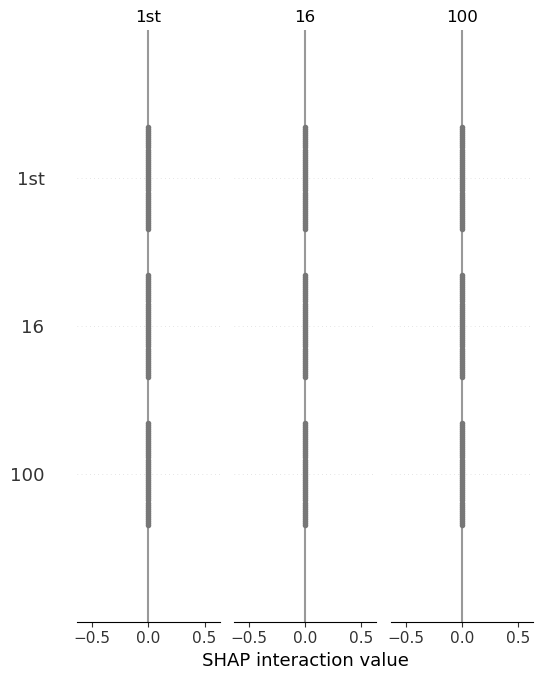

In [4]:
# 8. Setup SHAP and explain
explainer = shap.LinearExplainer(model, X_train_vectorized)  # No need for feature_dependence now
shap_values = explainer.shap_values(X_test_vectorized)

# 9. Plot SHAP
shap.summary_plot(shap_values, features=X_test_vectorized, feature_names=vectorizer.get_feature_names_out())


C:\Users\91984\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\91984\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


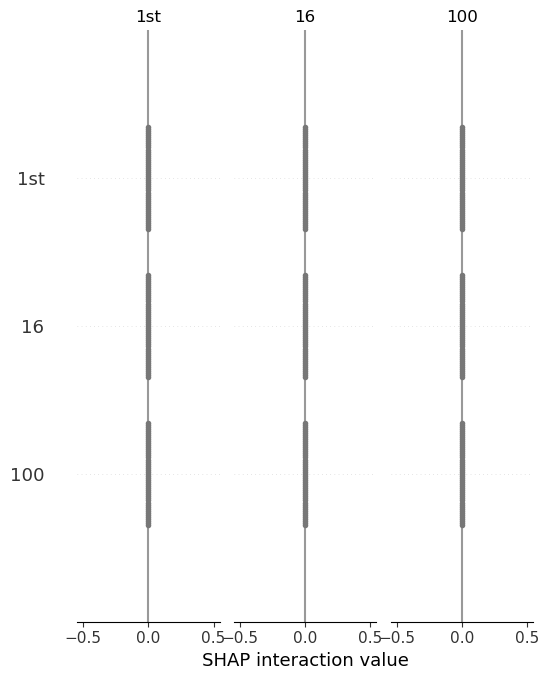

In [8]:
# Step 1: Import libraries
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Step 2: Load dataset
file_path = "finalised dataset.csv"
df = pd.read_csv(file_path)

# Step 3: Drop missing feedbacks
df = df.dropna(subset=['Feedbacks'])
df = df.reset_index(drop=True)

# Step 4: Prepare features (X) and target (y)
X = df['Feedbacks']
y = df['Sentiment']

# Step 5: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Step 7: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Step 8: Setup SHAP
explainer = shap.LinearExplainer(model, X_train_vectorized)

# Step 9: Compute SHAP values
shap_values = explainer.shap_values(X_test_vectorized)

# Step 10: Generate SHAP plot
shap.summary_plot(shap_values, features=X_test_vectorized, feature_names=vectorizer.get_feature_names_out())


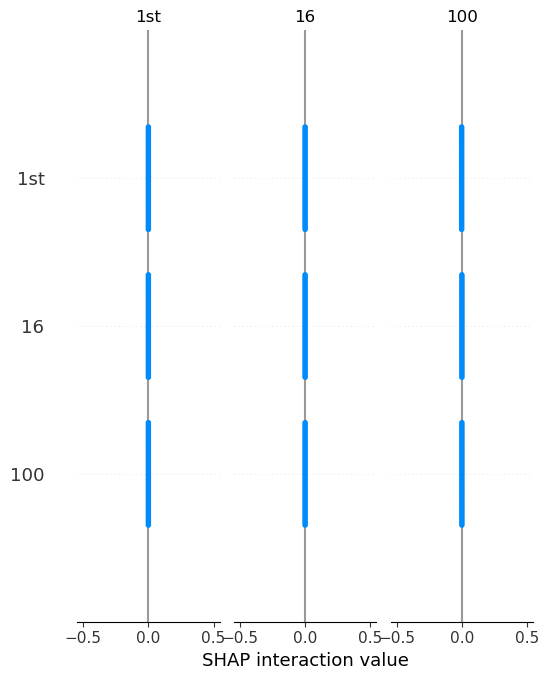

In [9]:
# Compute SHAP values
shap_values = explainer.shap_values(X_test_vectorized)

# ✅ Correct SHAP plot
shap.summary_plot(
    shap_values,
    features=X_test_vectorized.toarray(),  # << IMPORTANT
    feature_names=vectorizer.get_feature_names_out()
)


In [10]:
# Install if needed
!pip install shap

# Imports
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load your dataset
file_path = "finalised dataset.csv"
df = pd.read_csv(file_path)

# Drop missing feedbacks
df = df.dropna(subset=['Feedbacks'])
df = df.reset_index(drop=True)

# Features and Target
X = df['Feedbacks']
y = df['Sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# ✅ Setup SHAP KernelExplainer correctly
explainer = shap.KernelExplainer(model.predict_proba, X_train_vectorized[:100].toarray())

# Calculate shap_values for a small sample (to avoid heavy computation)
shap_values = explainer.shap_values(X_test_vectorized[:50].toarray())

# ✅ Correct SHAP plot
shap.summary_plot(
    shap_values[1],  # Focus on Positive class (if multiclass)
    features=X_test_vectorized[:50].toarray(),
    feature_names=vectorizer.get_feature_names_out()
)


  0%|          | 0/50 [00:00<?, ?it/s]

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [11]:
# Install SHAP if needed
!pip install shap

# Import necessary libraries
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load dataset
file_path = "finalised dataset.csv"
df = pd.read_csv(file_path)

# Drop missing feedbacks
df = df.dropna(subset=['Feedbacks'])
df = df.reset_index(drop=True)

# Features and labels
X = df['Feedbacks']
y = df['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Setup SHAP Explainer
explainer = shap.KernelExplainer(model.predict_proba, X_train_vectorized[:100].toarray())

# Calculate shap values
shap_values = explainer.shap_values(X_test_vectorized[:50].toarray())

# ⚡ Fix for Multiclass:
# shap_values will be a list with 3 elements (for Positive, Neutral, Negative)
# Take average shap values across all classes for overall importance
mean_shap_values = (shap_values[0] + shap_values[1] + shap_values[2]) / 3

# ✅ Now plot the correct SHAP summary
shap.summary_plot(
    mean_shap_values, 
    features=X_test_vectorized[:50].toarray(),
    feature_names=vectorizer.get_feature_names_out()
)


  0%|          | 0/50 [00:00<?, ?it/s]

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [12]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 78.43%


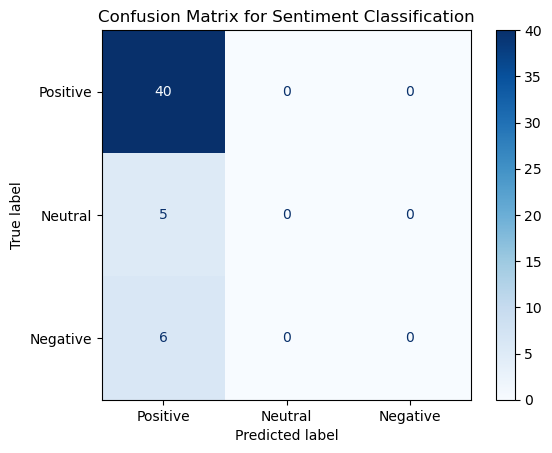

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test_vectorized)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Sentiment Classification')
plt.show()


In [14]:
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [16]:
# Get top words
positive_words_df = get_frequent_words("Positive", num_words=5)  # Change number of words
negative_words_df = get_frequent_words("Negative", num_words=5)  # Change number of words

# Plot Top Words in Positive Reviews
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=positive_words_df, palette="Blues_r")
plt.title("Top 5 Words in Positive Reviews")  # Change title
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Plot Top Words in Negative Reviews
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=negative_words_df, palette="Reds_r")
plt.title("Top 5 Words in Negative Reviews")  # Change title
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

NameError: name 'get_frequent_words' is not defined

In [17]:
# Define a list of words that shouldn't appear in negative reviews
positive_words_to_remove = {"great", "good", "interesting", "like", "know"}

# Modify the function to exclude these words
def get_frequent_words(sentiment_label, num_words=10):
    text = " ".join(df[df["Sentiment"] == sentiment_label]["Feedbacks"].dropna())
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() 
                      and word.lower() not in stop_words 
                      and word.lower() not in positive_words_to_remove]  # Exclude positive words
    word_freq = Counter(filtered_words)
    return pd.DataFrame(word_freq.most_common(num_words), columns=["Word", "Frequency"])
